In [188]:
from os.path import basename

import pandas as pd

from collections import namedtuple, Counter
from glob import glob

import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
all_reviews_path = '../../aspects/data/aspects/Reviews-9-products/'

In [15]:
reviews_paths = glob(all_reviews_path + '*')

In [16]:
reviews_paths

['../../aspects/data/aspects/Reviews-9-products/MicroMP3.txt',
 '../../aspects/data/aspects/Reviews-9-products/Canon S100.txt',
 '../../aspects/data/aspects/Reviews-9-products/norton.txt',
 '../../aspects/data/aspects/Reviews-9-products/Diaper Champ.txt',
 '../../aspects/data/aspects/Reviews-9-products/Hitachi router.txt',
 '../../aspects/data/aspects/Reviews-9-products/ipod.txt',
 '../../aspects/data/aspects/Reviews-9-products/Nokia 6600.txt',
 '../../aspects/data/aspects/Reviews-9-products/Linksys Router.txt',
 '../../aspects/data/aspects/Reviews-9-products/Canon PowerShot SD500.txt']

In [149]:
def get_aspects(reviews_path: str) -> pd.DataFrame:
    print(reviews_path)
    all_aspects = []
    with open(reviews_path, 'r') as review_file:
        for line in review_file:
            aspects = [x for x in line.split('##')[0].split(',') if x]
            for aspect in aspects:
                aspect = aspect.strip()
                aspect = aspect.replace('[u]', '').replace('[s]', '').replace('[p]', '')
                aspect = aspect.replace('[cs]', '')
                aspect = aspect.replace('{', '[').replace('}', ']')
                if aspect:
                    all_aspects.append(get_sentiment_from_aspect_sentiment_text(aspect))
    return pd.DataFrame(all_aspects)

In [150]:
def get_sentiment_from_aspect_sentiment_text(aspect_with_sentiment: str):
    aspect_splitted = aspect_with_sentiment.split('[')
    aspect = aspect_splitted[0]
    try:
        sentiment_str = aspect_splitted[1].replace(']', '')
    except IndexError:
        print(f'Error with: {aspect_with_sentiment}')
        raise Exception
    if '-' in sentiment_str:
        sentiment = -1
    elif '+' in sentiment_str:
        if len(sentiment_str) > 1:
            sentiment = int(sentiment_str)
        else:
            sentiment = 1
    else:
        sentiment = int(sentiment_str)
    return AspectSentiment(aspect=aspect.lower(), sentiment=sentiment)

In [187]:
df.aspect.value_counts()[df.aspect.value_counts()>1]

camera            26
lcd               10
pictures           9
image              5
sd500              4
flash              4
size               4
picture            3
quality            3
pics               3
canon              2
fits               2
software           2
photo              2
zoom               2
powerup            2
compact            2
buttons            2
video              2
user interface     2
battery            2
Name: aspect, dtype: int64

../../aspects/data/aspects/Reviews-9-products/MicroMP3.txt
../../aspects/data/aspects/Reviews-9-products/Canon S100.txt
../../aspects/data/aspects/Reviews-9-products/norton.txt
../../aspects/data/aspects/Reviews-9-products/Diaper Champ.txt
../../aspects/data/aspects/Reviews-9-products/Hitachi router.txt
../../aspects/data/aspects/Reviews-9-products/ipod.txt
../../aspects/data/aspects/Reviews-9-products/Nokia 6600.txt
../../aspects/data/aspects/Reviews-9-products/Linksys Router.txt
../../aspects/data/aspects/Reviews-9-products/Canon PowerShot SD500.txt


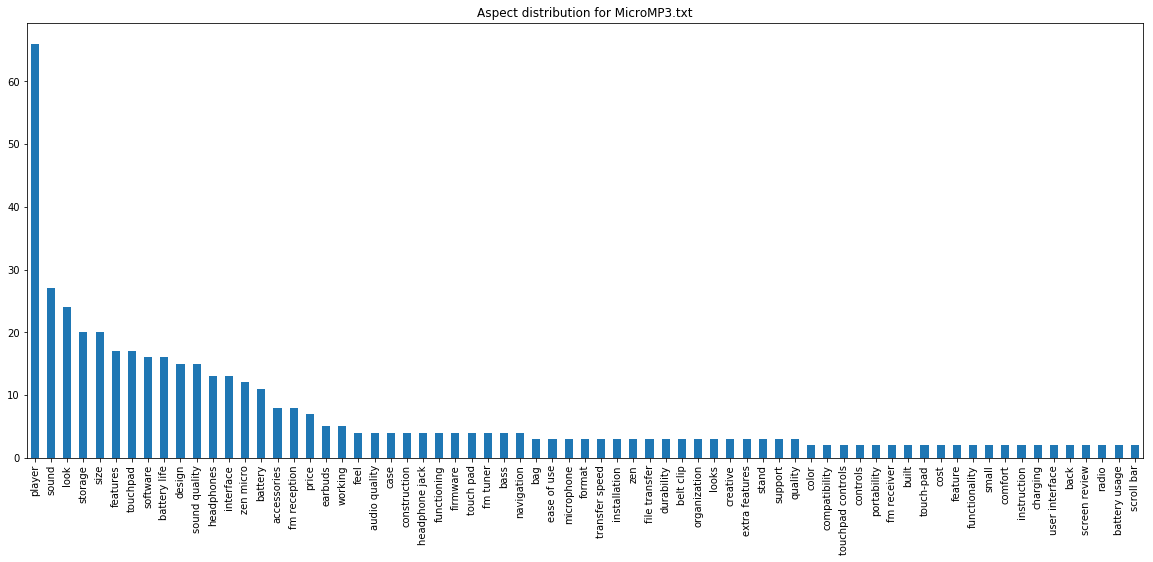

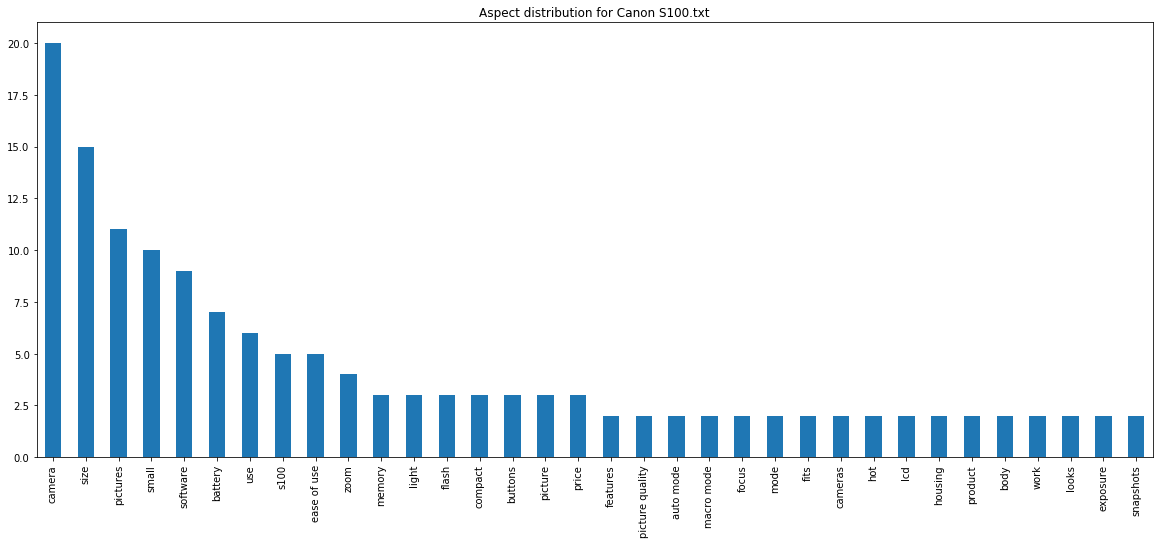

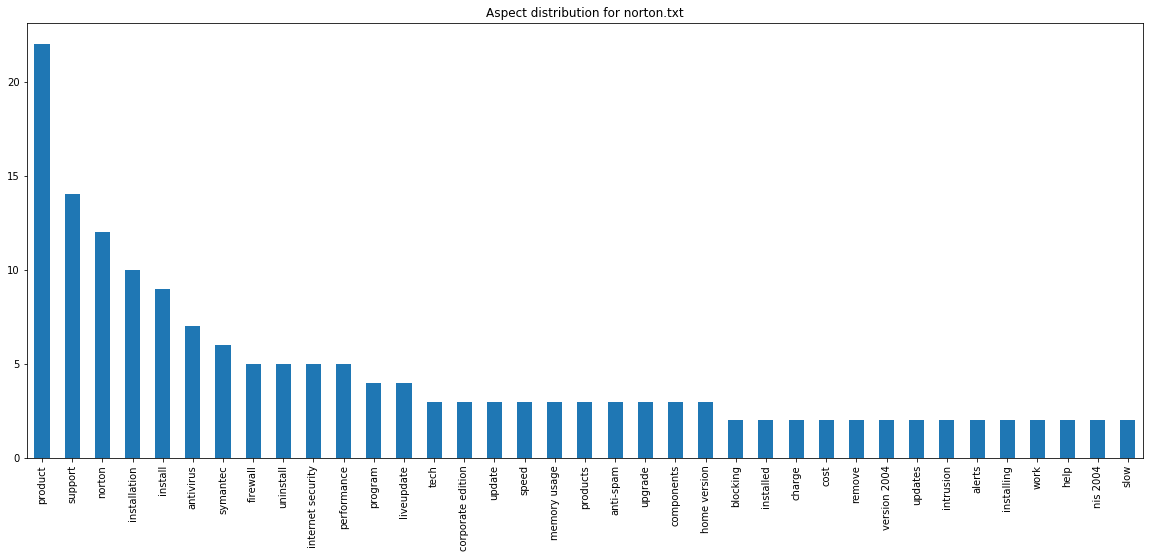

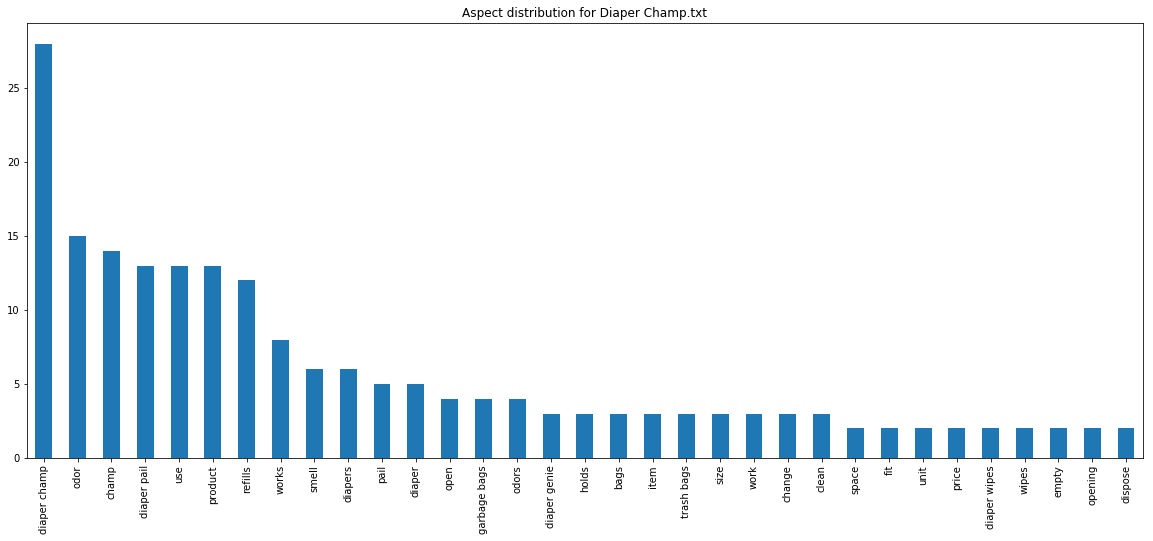

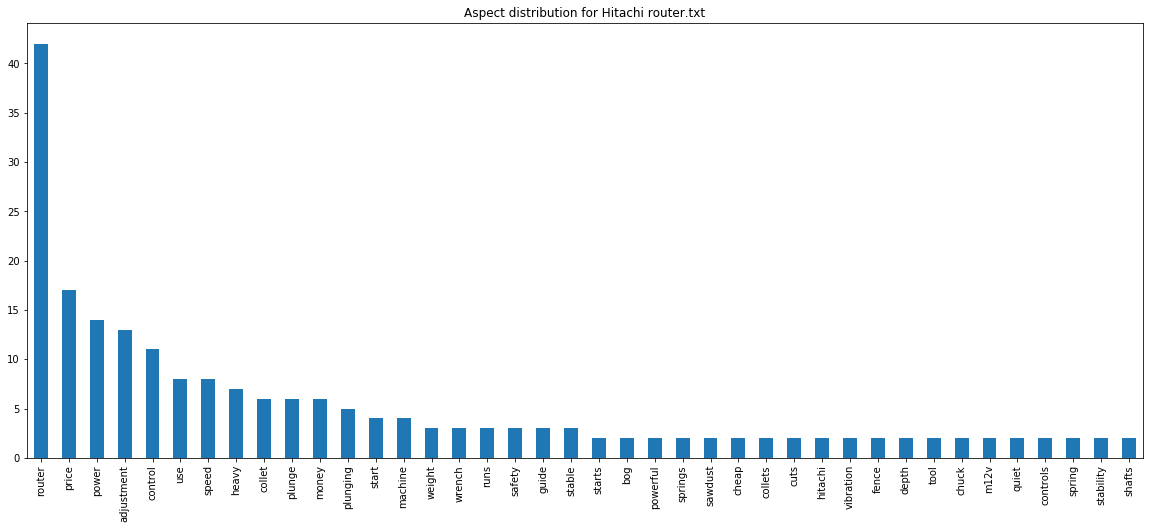

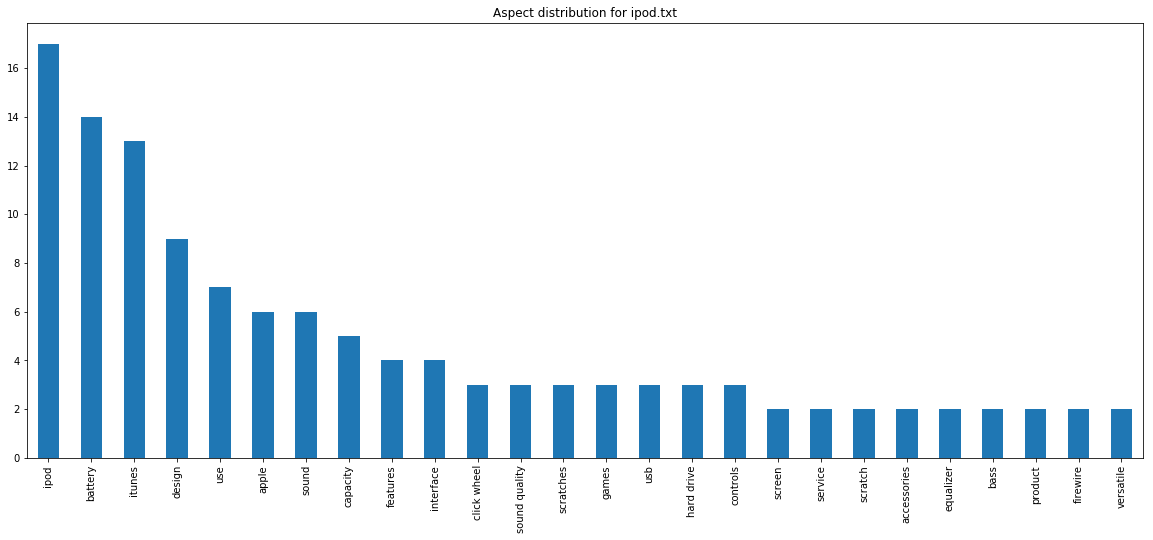

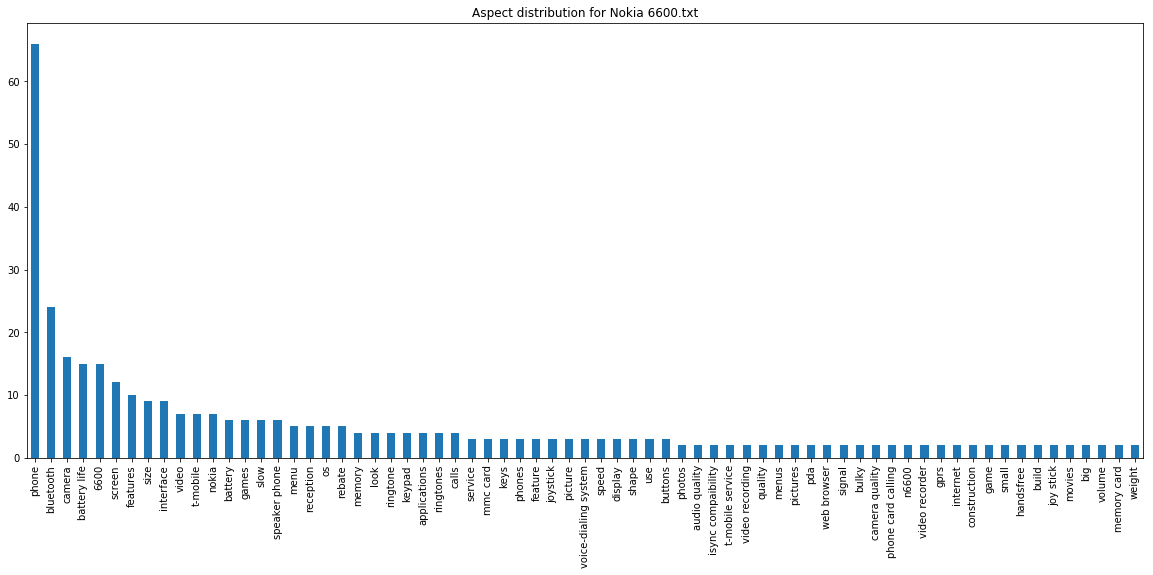

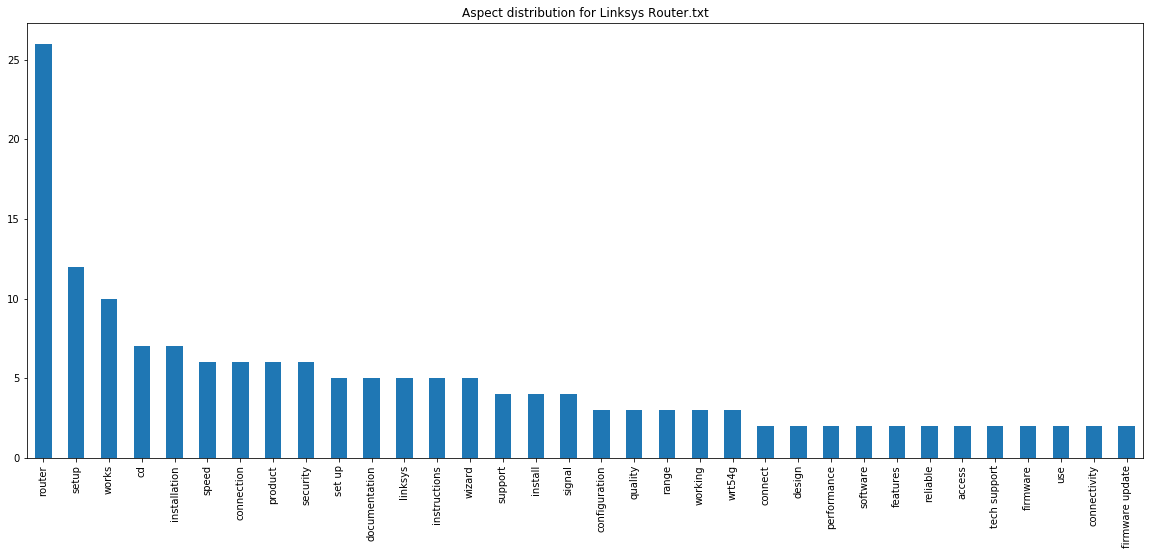

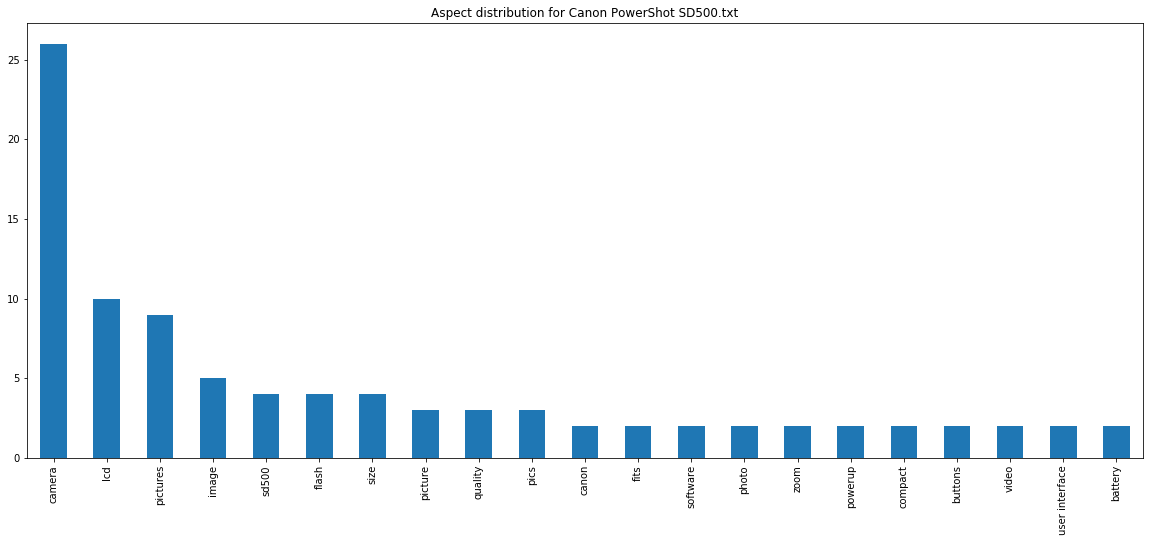

In [190]:
for reviews_path in reviews_paths:
    df = get_aspects(reviews_path)
    plt.figure(figsize=(20,8))
    plt.title(f'Aspect distribution for {basename(reviews_path)}')
    counts = df.aspect.value_counts()
    # take only aspects that appeared at least once 
    counts[counts>1].plot(kind='bar')